<a href="https://colab.research.google.com/github/45hv1n/Iris-Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Iris.zip

Archive:  Iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


####**Importing the Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("Iris.csv")

In [ ]:
df.drop(columns=["Id"],inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


####**Basic stats**


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

####**Count Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


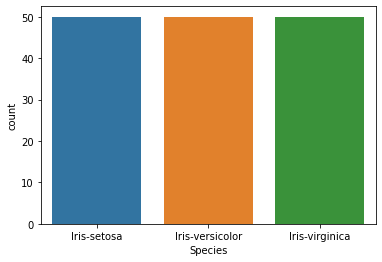

In [ ]:
sns.countplot(df["Species"])

####**Histogram**

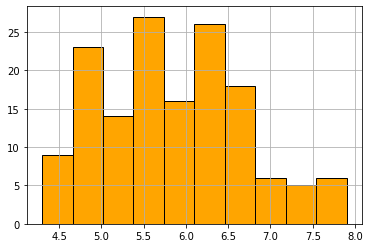

In [ ]:
df["SepalLengthCm"].hist(edgecolor='black',color="orange")

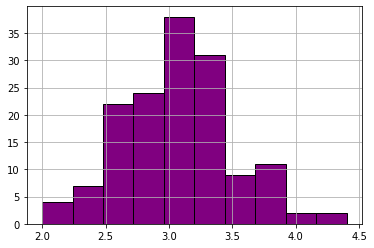

In [ ]:
df["SepalWidthCm"].hist(edgecolor='black',color='purple')

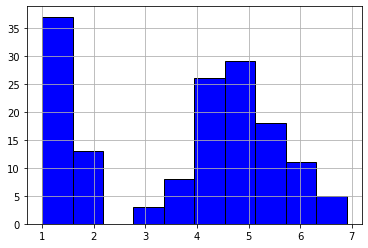

In [ ]:
df["PetalLengthCm"].hist(edgecolor="black",color="blue")

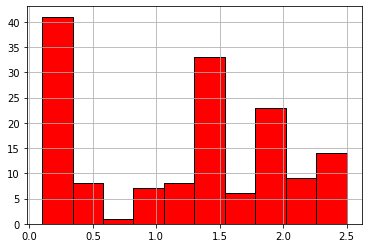

In [ ]:
df["PetalWidthCm"].hist(edgecolor="black",color="red")

####**Scatter Plot**

In [ ]:
species= ["Iris-setosa","Iris-versicolor","Iris-virginica"]
colors= ["red","orange","purple"]

def scatter_plot(x_ax,y_ax):
    for i in range(3):
        x= df[df["Species"] == species[i]]
        plt.scatter(x[x_ax],x[y_ax],c= colors[i],label= species[i])
    plt.title(x_ax +" vs "+ y_ax)
    plt.xlabel(x_ax)
    plt.ylabel(y_ax)
    plt.legend()

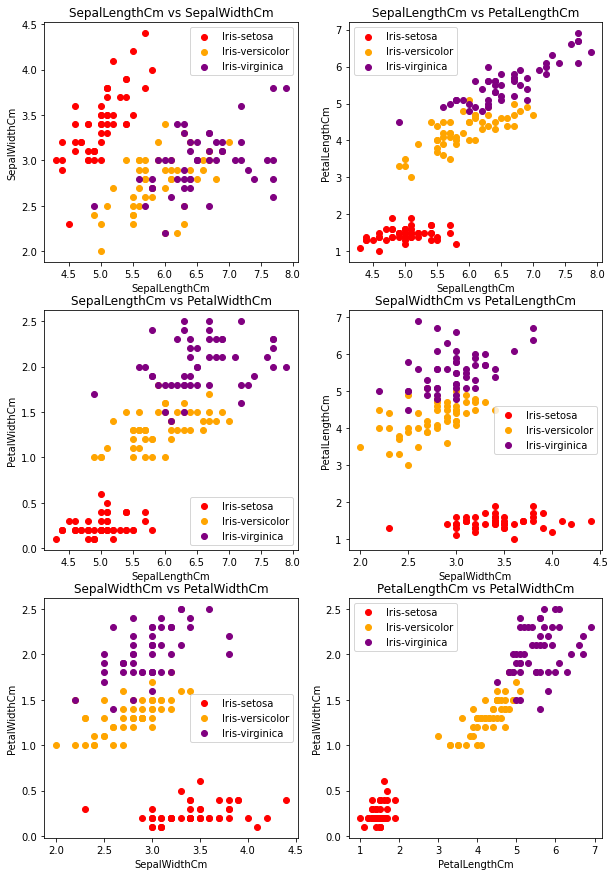

In [ ]:

plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
scatter_plot("SepalLengthCm","SepalWidthCm")

plt.subplot(3,2,2)
scatter_plot("SepalLengthCm","PetalLengthCm")

plt.subplot(3,2,3)
scatter_plot("SepalLengthCm","PetalWidthCm")

plt.subplot(3,2,4)
scatter_plot("SepalWidthCm","PetalLengthCm")

plt.subplot(3,2,5)
scatter_plot("SepalWidthCm","PetalWidthCm")

plt.subplot(3,2,6)
scatter_plot("PetalLengthCm","PetalWidthCm")

#plt.subplot_tool()
plt.show()

####**Heatmap of Correlation**

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


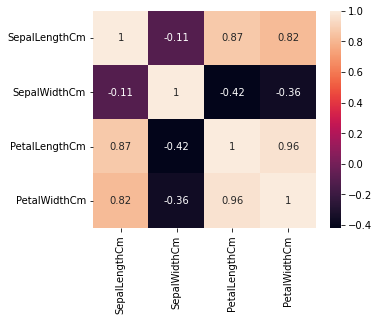

In [ ]:
corr= df.corr()
fig,ax= plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

####**Encoding the categorical columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
df["Species"] = le.fit_transform(df["Species"])
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
129,7.2,3.0,5.8,1.6,2
120,6.9,3.2,5.7,2.3,2
100,6.3,3.3,6.0,2.5,2
51,6.4,3.2,4.5,1.5,1
79,5.7,2.6,3.5,1.0,1
81,5.5,2.4,3.7,1.0,1
77,6.7,3.0,5.0,1.7,1
128,6.4,2.8,5.6,2.1,2
116,6.5,3.0,5.5,1.8,2


####**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

x= df.drop(columns=["Species"])
y= df["Species"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size= 0.2)

####**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

Linear_model= LinearRegression()

Linear_model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
Linear_model.score(xtest,ytest)

0.8888972892656107

####**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Log_model= LogisticRegression ()

Log_model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Log_model.score(xtest,ytest)

0.9666666666666667

####**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Knn_model = KNeighborsClassifier()

Knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
Knn_model.score(xtest, ytest)

0.9

####**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Tree_model= DecisionTreeClassifier()

Tree_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
Tree_model.score(xtest,ytest)

0.9333333333333333

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model= RandomForestClassifier(n_estimators=120 , min_samples_split= 15, max_depth=22 ,max_features=1)

forest_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=22, max_features=1, min_samples_split=15,
                       n_estimators=120)

In [ ]:
forest_model.score(xtest,ytest)

0.9666666666666667